<a href="https://colab.research.google.com/github/AlfaruqTi22E/citra-digital/blob/main/Project_Implementasi_Segmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melakukan segmentasi untuk threshold: 50
Hasil disimpan ke output_images/segmented_image_t50.png
Visualisasi hasil disimpan ke output_images/visualization_t50.png


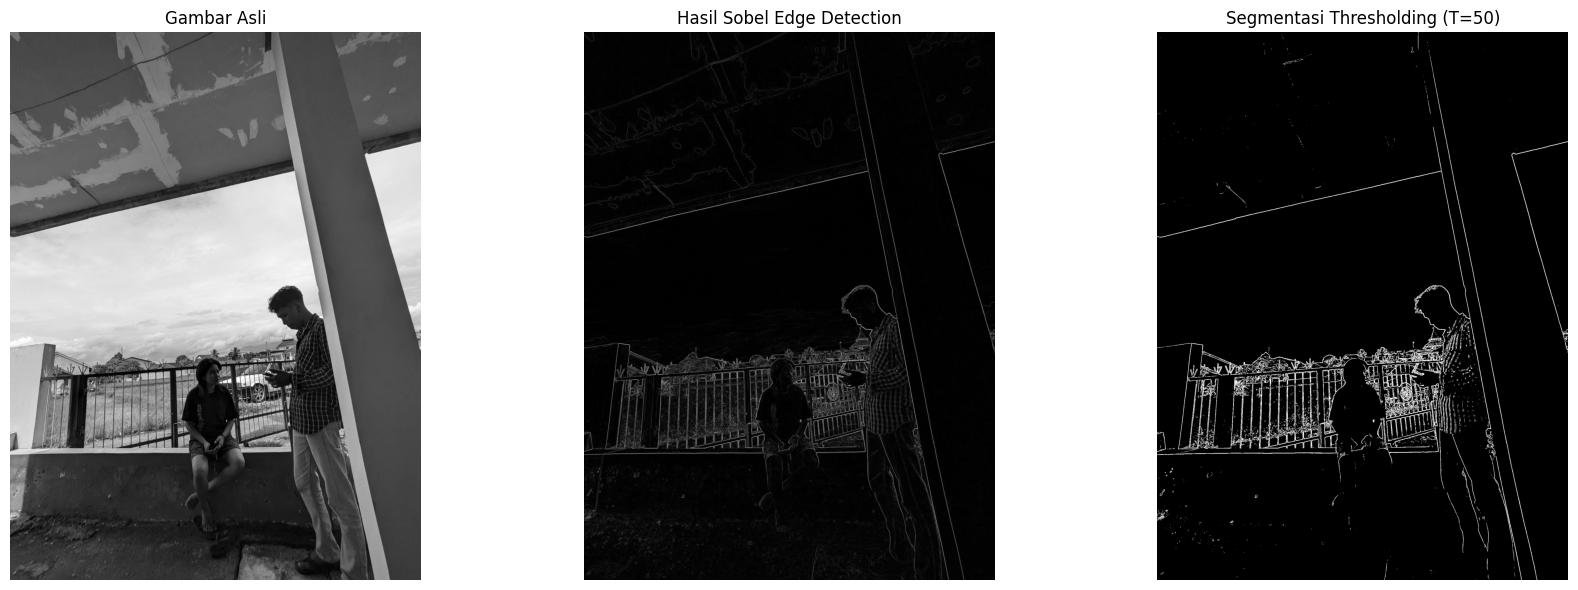

Analisa hasil disimpan ke output_images/analysis_threshold_50.txt
Melakukan segmentasi untuk threshold: 100
Hasil disimpan ke output_images/segmented_image_t100.png
Visualisasi hasil disimpan ke output_images/visualization_t100.png


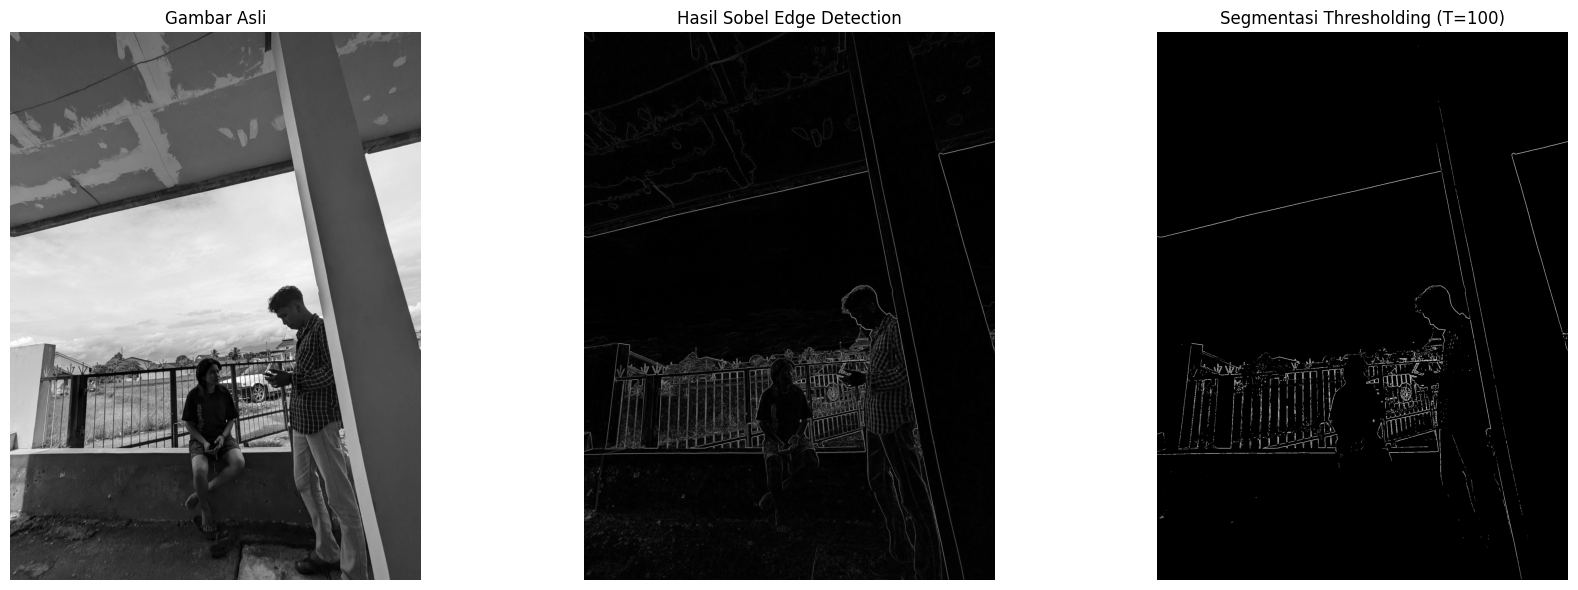

Analisa hasil disimpan ke output_images/analysis_threshold_100.txt
Melakukan segmentasi untuk threshold: 150
Hasil disimpan ke output_images/segmented_image_t150.png
Visualisasi hasil disimpan ke output_images/visualization_t150.png


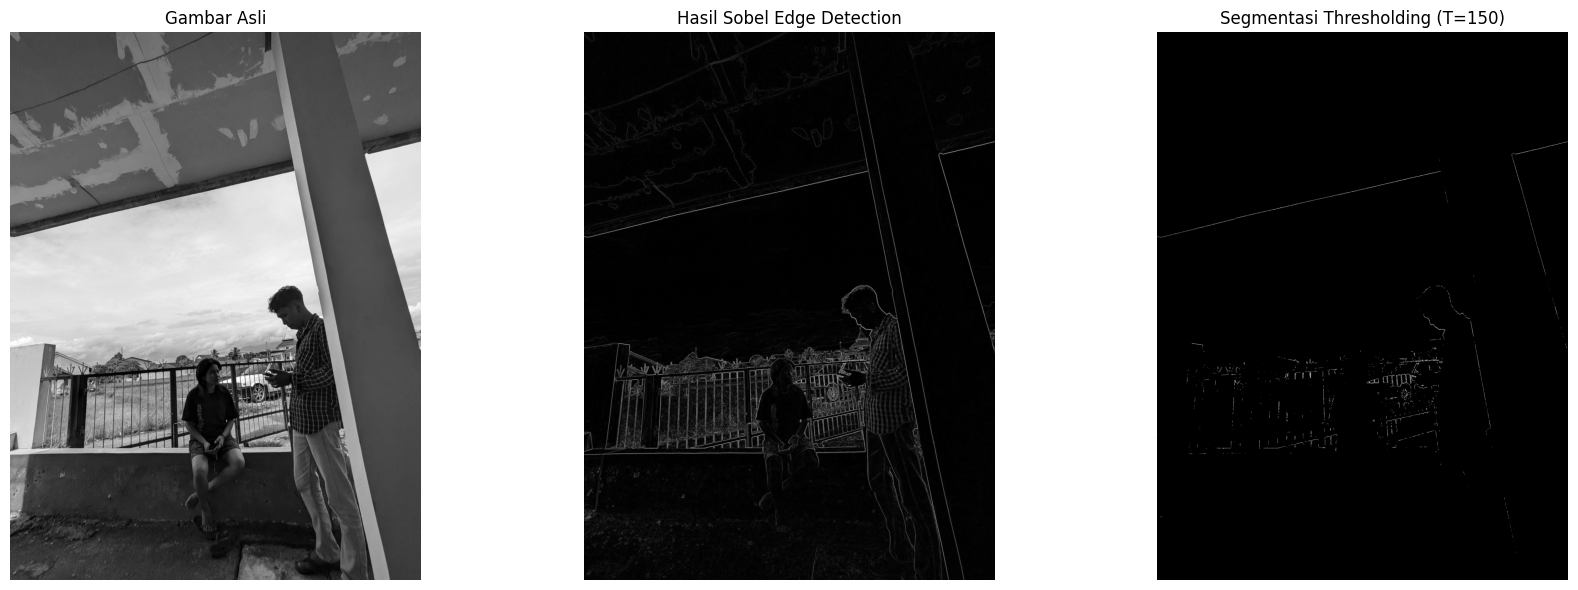

Analisa hasil disimpan ke output_images/analysis_threshold_150.txt
Melakukan segmentasi untuk threshold: 200
Hasil disimpan ke output_images/segmented_image_t200.png
Visualisasi hasil disimpan ke output_images/visualization_t200.png


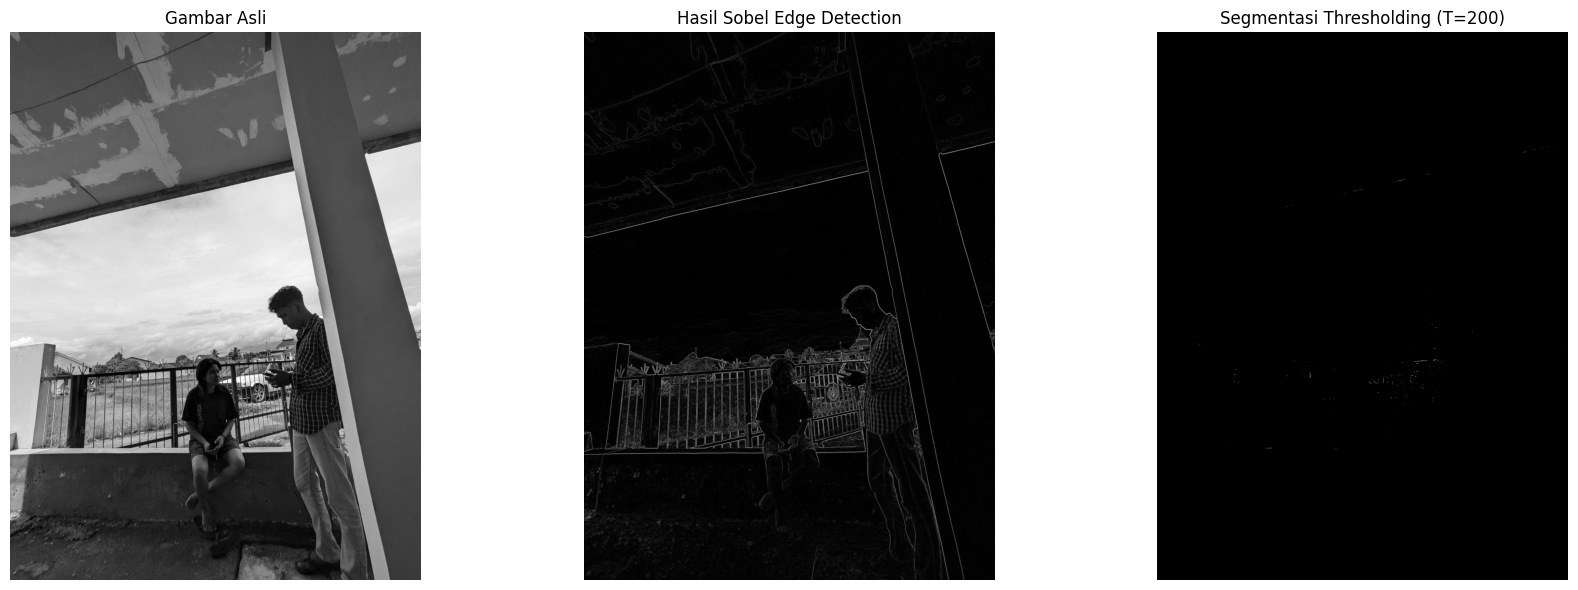

Analisa hasil disimpan ke output_images/analysis_threshold_200.txt


In [16]:

# Import Library
import imageio.v2 as imageio  # menggunakan namespace v2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import os

# Fungsi untuk membaca gambar
def load_image(file_path):
    return imageio.imread(file_path, pilmode='F')  # Menggunakan pilmode untuk mendukung grayscale

# Fungsi untuk mendeteksi tepi menggunakan Sobel
def sobel_edge_detection(image):
    sobel_x = sobel(image, axis=0)
    sobel_y = sobel(image, axis=1)
    sobel_combined = np.hypot(sobel_x, sobel_y)
    return sobel_combined / np.max(sobel_combined) * 255  # Normalisasi ke skala 0-255

# Fungsi untuk segmentasi dengan thresholding
def basic_thresholding(image, threshold):
    return image > threshold

# Fungsi untuk menyimpan hasil gambar
def save_image(image, file_path):
    # Konversi boolean image ke format uint8 (0 dan 255 untuk penyimpanan)
    image_to_save = (image * 255).astype(np.uint8) if image.dtype == bool else image.astype(np.uint8)
    imageio.imwrite(file_path, image_to_save)
    print(f"Hasil disimpan ke {file_path}")

# Fungsi untuk visualisasi
def visualize_results(original, sobel_edge, segmented, threshold, save_path=None):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Gambar Asli")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Hasil Sobel Edge Detection")
    plt.imshow(sobel_edge, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Segmentasi Thresholding (T={threshold})")
    plt.imshow(segmented, cmap='gray')
    plt.axis('off')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Visualisasi hasil disimpan ke {save_path}")

    plt.tight_layout()
    plt.show()

# Fungsi untuk analisis hasil segmentasi
def analyze_segmentation(segmented_image, threshold, output_dir):
    total_pixels = segmented_image.size
    segmented_pixels = np.sum(segmented_image)
    percentage_segmented = segmented_pixels / total_pixels * 100

    # Simpan laporan analisa
    report_path = os.path.join(output_dir, f'analysis_threshold_{threshold}.txt')
    with open(report_path, 'w') as report_file:
        report_file.write(f"Analisa Hasil Segmentasi (T={threshold})\n")
        report_file.write(f"Total piksel pada gambar: {total_pixels}\n")
        report_file.write(f"Total piksel yang tersegmentasi: {segmented_pixels}\n")
        report_file.write(f"Persentase piksel yang tersegmentasi: {percentage_segmented:.2f}%\n")
    print(f"Analisa hasil disimpan ke {report_path}")

# Fungsi utama
def main():
    # Path gambar input
    image_path = '/content/drive/MyDrive/Colab Notebooks/dataset/image.jpg'

    # Path untuk menyimpan hasil
    output_dir = 'output_images'
    os.makedirs(output_dir, exist_ok=True)

    # Load gambar
    original_image = load_image(image_path)

    # Deteksi tepi dengan Sobel
    sobel_result = sobel_edge_detection(original_image)

    # Daftar nilai threshold yang ingin diuji
    threshold_values = [50, 100, 150, 200]

    for threshold_value in threshold_values:
        print(f"Melakukan segmentasi untuk threshold: {threshold_value}")

        # Thresholding
        segmented_image = basic_thresholding(sobel_result, threshold_value)

        # Simpan hasil ke file
        save_image(
            segmented_image,
            os.path.join(output_dir, f'segmented_image_t{threshold_value}.png')
        )

        # Visualisasi dan simpan gambar hasilnya
        visualize_results(
            original_image,
            sobel_result,
            segmented_image,
            threshold_value,
            save_path=os.path.join(output_dir, f'visualization_t{threshold_value}.png')
        )

        # Analisa hasil
        analyze_segmentation(segmented_image, threshold_value, output_dir)

# Jalankan program
if __name__ == "__main__":
    main()